<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Executive-Summary" data-toc-modified-id="Executive-Summary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Executive Summary</a></span></li><li><span><a href="#Ideas-for-notebook" data-toc-modified-id="Ideas-for-notebook-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Ideas for notebook</a></span></li><li><span><a href="#Metric-Goals" data-toc-modified-id="Metric-Goals-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Metric Goals</a></span></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load Data</a></span><ul class="toc-item"><li><span><a href="#Data-schema" data-toc-modified-id="Data-schema-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Data schema</a></span></li><li><span><a href="#Change-from-daily-grain-to-weekly" data-toc-modified-id="Change-from-daily-grain-to-weekly-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Change from daily grain to weekly</a></span></li></ul></li><li><span><a href="#Efficiency-metrics" data-toc-modified-id="Efficiency-metrics-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Efficiency metrics</a></span><ul class="toc-item"><li><span><a href="#CTR" data-toc-modified-id="CTR-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>CTR</a></span><ul class="toc-item"><li><span><a href="#US-CTR-rankings-(by-mean-values)" data-toc-modified-id="US-CTR-rankings-(by-mean-values)-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>US CTR rankings (by mean values)</a></span></li><li><span><a href="#UK-CTR-rankings-(by-mean-values)" data-toc-modified-id="UK-CTR-rankings-(by-mean-values)-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>UK CTR rankings (by mean values)</a></span></li></ul></li><li><span><a href="#CPC" data-toc-modified-id="CPC-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>CPC</a></span><ul class="toc-item"><li><span><a href="#US-CPC-rankings-(by-mean-values)" data-toc-modified-id="US-CPC-rankings-(by-mean-values)-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>US CPC rankings (by mean values)</a></span></li><li><span><a href="#UK-CPC-rankings-(by-mean-values)" data-toc-modified-id="UK-CPC-rankings-(by-mean-values)-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>UK CPC rankings (by mean values)</a></span></li></ul></li></ul></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Analysis</a></span><ul class="toc-item"><li><span><a href="#US" data-toc-modified-id="US-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>US</a></span><ul class="toc-item"><li><span><a href="#US-Top-common-keywords-in-CTR-and-CPC-top-10" data-toc-modified-id="US-Top-common-keywords-in-CTR-and-CPC-top-10-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>US Top common keywords in CTR and CPC top 10</a></span></li><li><span><a href="#US-Bottom-common-keywords-in-CTR-and-CPC-bottom-9" data-toc-modified-id="US-Bottom-common-keywords-in-CTR-and-CPC-bottom-9-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>US Bottom common keywords in CTR and CPC bottom 9</a></span></li></ul></li><li><span><a href="#UK" data-toc-modified-id="UK-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>UK</a></span><ul class="toc-item"><li><span><a href="#UK-Top-10-keywords-in-CTR-and-CPC" data-toc-modified-id="UK-Top-10-keywords-in-CTR-and-CPC-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>UK Top 10 keywords in CTR and CPC</a></span></li><li><span><a href="#UK-Bottom-9-keywords-in-CTR-and-CPC" data-toc-modified-id="UK-Bottom-9-keywords-in-CTR-and-CPC-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>UK Bottom 9 keywords in CTR and CPC</a></span></li></ul></li><li><span><a href="#Visualizations" data-toc-modified-id="Visualizations-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Visualizations</a></span></li></ul></li><li><span><a href="#General-Trends" data-toc-modified-id="General-Trends-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>General Trends</a></span></li></ul></div>

In [161]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
%load_ext watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [162]:
# watermark
%watermark -v -n -m -p numpy -g

Mon Feb 11 2019 

CPython 3.7.1
IPython 7.2.0

numpy 1.15.4

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 17.7.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit
Git hash   : 1e82042b9b8806c66951e3c746e84e3a2a89c6c0


# Executive Summary 

# Ideas for notebook 
- execute data make file from notebook
- notebook will serve more as a dashboard and report 
- consider spark lines to show evolution of click thru rates

# Metric Goals

In order to have an efficient ad campaign we prefer high percentage metrics and low cost metrics. Some available metrics include: 

- **Click Through Rate (CTR)** percentage of impressions that turn into clicks 
- **Conversion Rate** percentage of clicks that convert to actions taken
- **Cost per Click (CPC)** total spend divided by total clicks 
- **Cost per Acquisition (CPA)** total spend / total conversions

Given the metrics included in the **Data schema** below, we'll focus on **CTR** and **CPC** metrics for global and regional campaigns. If the table had conversion data, then we could analyze conversions metrics as well. 

# Load Data

## Data schema 
- date : date the data was recorded
- country : country the data was recorded for
- keyword : keyword associated with the campaign
- global_monthly_searches : total monthly searches for that keyword on google globally
- ad_position : how close to the top of the search result page the ad appeared (1 is the top)
- daily_clicks : number of clicks that occurred that day for the keyword
- daily_cost : amount of money spent for the clicks on that keyword on that day
- local_monthly_searches : total monthly searches for that keyword on google for the country
- impressions : number of times the ad was shown to a user that day for that keyword

In [163]:
file_location = 'data/raw/data_challenge.csv'
data = pd.read_csv(file_location, index_col='date')
data.index = pd.to_datetime(data.index)
data.head()

,country,keyword,global_monthly_searches,ad_position,daily_clicks,daily_cost,local_monthly_searches,impressions
date,,,,,,,,
2011-12-25,UK,financial services,4090000.0,1.0,8.0,234.22,246000.0,4757
2011-12-25,UK,certificate of deposit,1830000.0,1.0,148.0,159.49,201000.0,60635
2011-12-25,UK,joint account,201000.0,1.0,1.0,0.20,8100.0,26
2011-12-25,UK,insurance,33100.0,1.0,28.0,490.98,6600.0,34975
2011-12-25,UK,checking account,450000.0,1.0,50.0,133.00,33100.0,16997


## Change from daily grain to weekly
Keeping only features relevant to CTR and CPC. In this case we sum features by day for the week, using the Pandas resample method.  

In [271]:
data = data[['country', 'keyword', 'daily_clicks', 'daily_cost', 'impressions']].resample('W').sum()
data.head()

,daily_clicks,daily_cost,impressions
date,,,
2011-12-25,2435.0,15042.900000,71904681
2012-01-01,68478.0,471561.325000,4916441932
2012-01-08,87086.0,636497.591667,8839203547
2012-01-15,117209.0,936095.200000,13620597748
2012-01-22,111821.0,961486.345000,13214692042


# Efficiency metrics

## CTR

In [164]:
# define click thru rate
data['CTR'] = data['daily_clicks'] / data['impressions']

### US CTR rankings (by mean values)

In [165]:
region = 'US'


def rank_ctr(data, region):
    df = (data[data['country'] == region]
          .groupby('keyword')[['CTR']]
          .agg('mean')
          .sort_values(by='CTR', ascending=False))
    return df


us_ctr = rank_ctr(data, region)
us_ctr

,CTR
keyword,
banking careers,0.064094
rewards card,0.059658
bankruptcy,0.047311
interest rate,0.046541
debit,0.037072
atm,0.034837
credit cards,0.029102
mortgage,0.026018
lawyer,0.015995


### UK CTR rankings (by mean values)

In [166]:
region = 'UK'
uk_ctr = rank_ctr(data, region)
uk_ctr

,CTR
keyword,
bankruptcy,0.063706
atm,0.052742
credit cards,0.052474
overdraft fee,0.050241
joint account,0.049761
debit,0.048501
interest rate,0.044282
rewards card,0.042312
banking careers,0.037037


## CPC

In [167]:
# define daily CPC, total spend / total clicks 
data['CPC'] = data['daily_cost'] / data['daily_clicks']
# replace inf with None, this handles days with zero clicks
data['CPC'].replace(np.inf, None, inplace=True)

### US CPC rankings (by mean values)

In [168]:
region = 'US'


def rank_cpc(data, region):
    df = (data[(data['country'] == region)]
          .groupby('keyword')[['CPC']]
          .agg('mean')
          .sort_values(by='CPC'))
    return df


us_cpc = rank_cpc(data, region)
us_cpc

,CPC
keyword,
financial services,0.356532
banking careers,0.805990
minimum balance,0.809601
interest rate,0.918934
bankruptcy,1.130540
lawyer,1.364759
rewards card,1.938794
certificate of deposit,3.316022
consolidate loans,3.845810


### UK CPC rankings (by mean values)

In [169]:
region = 'UK'
uk_cpc = rank_cpc(data, region)
uk_cpc

,CPC
keyword,
credit cards,0.367292
debit,0.373333
rewards card,0.522535
banking careers,0.532143
interest rate,0.772643
bankruptcy,0.824024
atm,0.957555
lawyer,1.390875
overdraft fee,1.493898


# Analysis 

## US 

### US Top common keywords in CTR and CPC top 10 

In [190]:
first_index = 0
last_index = 10
region = 'US'


def common_keywords(data, region, first_index=0, last_index=10):
    df_ctr = rank_ctr(data, region)
    df_cpc = rank_cpc(data, region)
    top_ctr = list(df_ctr.index[first_index:last_index])
    top_cpc = list(df_cpc.index[first_index:last_index])
    top = list(set(top_ctr) & set(top_cpc))
    return top


top_us_ctr = common_keywords(data, region, first_index=0, last_index=10)
top_us_ctr

['atm',
 'banking careers',
 'rewards card',
 'lawyer',
 'bankruptcy',
 'interest rate']

### US Bottom common keywords in CTR and CPC bottom 9 

In [177]:
common_keywords(data, 'US', first_index=11, last_index=19)

['wire transfer', 'loans', 'joint account']

## UK

### UK Top 10 keywords in CTR and CPC

In [179]:
common_keywords(data, 'UK', first_index=0, last_index=10)

['atm',
 'banking careers',
 'rewards card',
 'bankruptcy',
 'credit cards',
 'interest rate',
 'debit',
 'overdraft fee']

### UK Bottom 9 keywords in CTR and CPC

In [180]:
common_keywords(data, 'UK', first_index=11, last_index=19)

['insurance',
 'consolidate loans',
 'minimum balance',
 'financial services',
 'loans',
 'checking account']

## Visualizations

In [192]:
top_us_ctr

['atm',
 'banking careers',
 'rewards card',
 'lawyer',
 'bankruptcy',
 'interest rate']

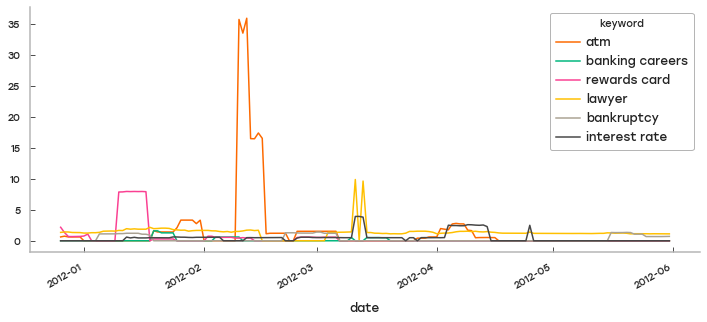

In [204]:
region = 'US'
df = data[(data['country'] == region)]
df.pivot_table(columns='keyword', values='CPC', index=df.index, fill_value=0)[top_us_ctr].plot(figsize=(12,5));

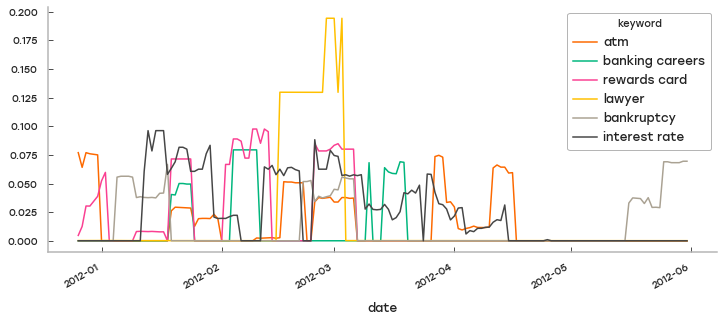

In [214]:
region = 'US'
df = data[(data['country'] == region)]
df = df.pivot_table(columns='keyword', values='CTR', index=df.index, fill_value=0)[top_us_ctr]
df.plot(figsize=(12,5));

In [264]:
df.tail()

keyword,atm,banking careers,rewards card,lawyer,bankruptcy,interest rate
date,,,,,,
2012-05-26,0.0,0.0,0.0,0.000094,0.068966,0.0
2012-05-27,0.0,0.0,0.0,0.000094,0.068182,0.0
2012-05-29,0.0,0.0,0.0,0.000094,0.068182,0.0
2012-05-30,0.0,0.0,0.0,0.000094,0.069444,0.0
2012-05-31,0.0,0.0,0.0,0.000094,0.069444,0.0


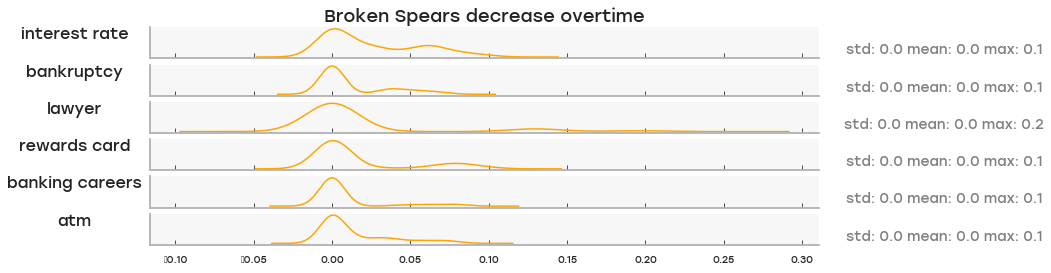

In [260]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1, sharex=True, figsize=(12,4))
title = 'Broken Spears decrease overtime'

for column, axess in zip(df.columns[::-1],(ax1, ax2, ax3, ax4, ax5, ax6)):
    df[column].plot( kind = 'density',ax = axess, color='orange' )
    axess.set_ylabel( str(column), rotation=0, labelpad =75, fontsize=16)
    axess.get_yaxis().set_ticks([])
    #axess.set_xticks(means)
    axess.set_facecolor('.97')
    
    axess2 = axess.twinx()
    std = round(df[column].std(),1)
    local_low = round(df[column].min(),1)
    local_max = round(df[column].max(),1)
    local_mean = round(df[column].mean(),1)
    right_string = 'std: {std} mean: {local_mean} max: {local_max}'.format(std=std, local_mean=local_mean,  local_max=local_max)
    axess2.set_ylabel(right_string, rotation=0, labelpad = 125, fontsize=14, color ='gray')
    axess2.get_yaxis().set_ticks([])
ax1.set_title(title, fontsize=18);
    
#fig.tight_layout()

In [211]:
data.index.min()

Timestamp('2011-12-25 00:00:00')

In [212]:
data.index.max()

Timestamp('2012-05-31 00:00:00')

# General Trends

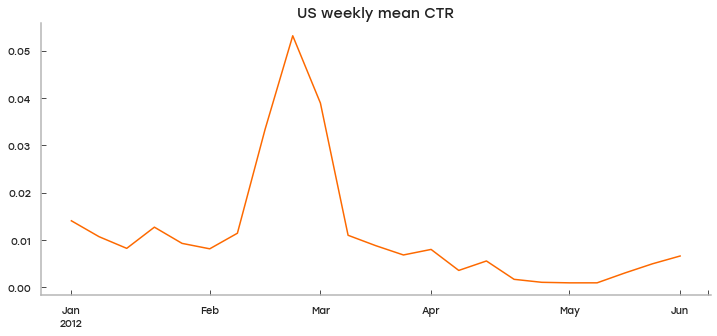

In [239]:
title = 'US weekly mean CTR'
region='US'
data[(data['country']==region)][['CTR']].resample('W').mean().plot(figsize=(12,5), title=title, legend=False);
plt.xlabel("");

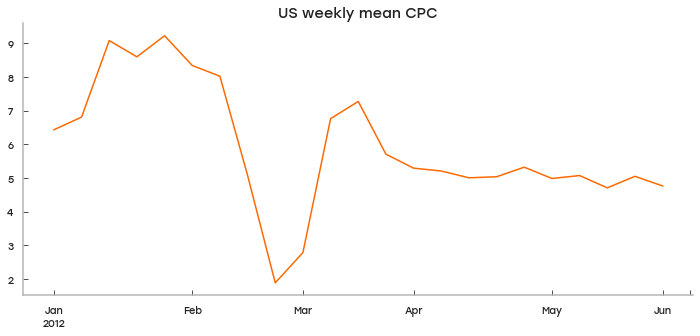

In [240]:
title = 'US weekly mean CPC'
region='US'
data[(data['country']==region)][['CPC']].resample('W').mean().plot(figsize=(12,5), title=title, legend=False);
plt.xlabel("");

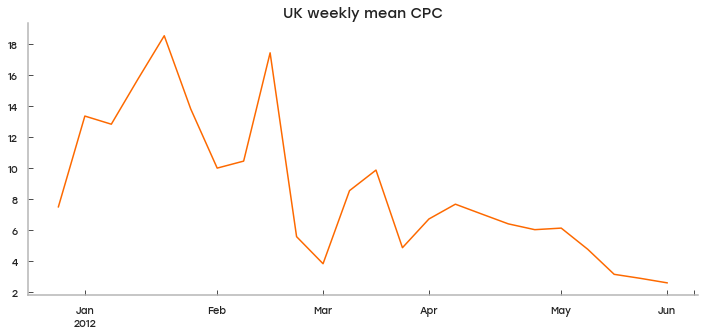

In [242]:
title = 'UK weekly mean CPC'
region='UK'
data[(data['country']==region)][['CPC']].resample('W').mean().plot(figsize=(12,5), title=title, legend=False);
plt.xlabel("");

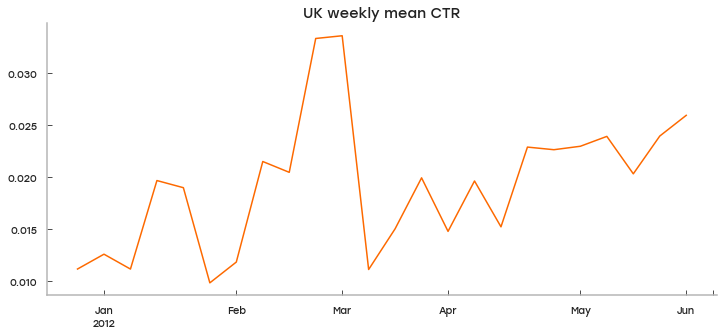

In [241]:
title = 'UK weekly mean CTR'
region='UK'
data[(data['country']==region)][['CTR']].resample('W').mean().plot(figsize=(12,5), title=title, legend=False);
plt.xlabel("");

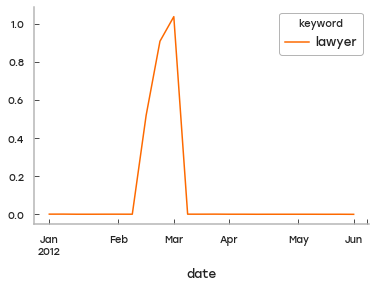

In [269]:
df[['lawyer']].resample("W").sum().plot()